In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import warnings as w
w.filterwarnings('ignore')

from tensorflow import keras
from tensorflow.keras import layers, datasets, Sequential

In [2]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [4]:
y_train.shape, y_test.shape

((60000,), (10000,))

In [5]:
X_train[0].shape 

(28, 28)

In [6]:
X_test[4].shape

(28, 28)

size of individual image or element is 28x28

<Figure size 500x100 with 0 Axes>

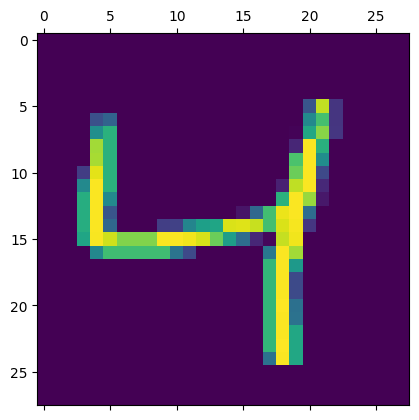

In [7]:
plt.figure(figsize=(5,1))
plt.matshow(X_train[2])

In [8]:
y_train[2]

4

In [9]:
X_train = X_train/255
X_test = X_test/255

In [10]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [11]:
# flatten X_train and X_test to 1d array
X_train_flat = X_train.reshape(len(X_train), 28*28)
X_test_flat = X_test.reshape(len(X_test), 28*28)

In [12]:
X_train_flat.shape

(60000, 784)

In [13]:
X_train_flat[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [14]:
# no hidden layer
ann = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

ann.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
           metrics=['accuracy'])

ann.fit(X_train_flat, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4692 - accuracy: 0.8770
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3037 - accuracy: 0.9157
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2833 - accuracy: 0.9208
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2730 - accuracy: 0.9235
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2671 - accuracy: 0.9253
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2616 - accuracy: 0.9275
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2587 - accuracy: 0.9284
Epoch 8/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2555 - accuracy: 0.9296
Epoch 9/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2524 - accuracy: 0.9303
Epoch 10/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.250

In [15]:
ann.evaluate(X_test_flat, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.2631 - accuracy: 0.9261


[0.2631130516529083, 0.9261000156402588]

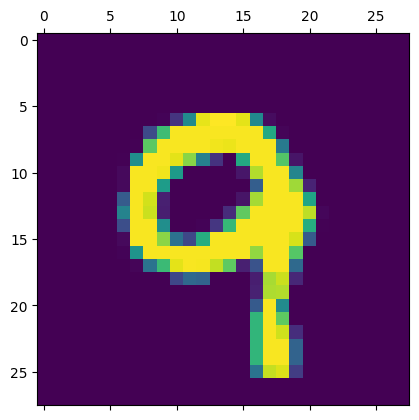

In [16]:
plt.matshow(X_test[99])

In [17]:
y_pred = ann.predict(X_test_flat)
y_pred[99]

313/313 [==============================] - 0s 1ms/step


array([1.95354232e-06, 1.04033155e-07, 5.42983459e-03, 1.39273482e-03,
       6.32194042e-01, 1.10339490e-04, 4.78880611e-06, 8.37740242e-01,
       2.43404120e-01, 9.99102950e-01], dtype=float32)

- These are 10 values of each category. 0,1,2,3,4,5,6,7,8,9. 
- Values shows percentage of similarity of every category. Max similarity is chossen

In [18]:
# use argmax()  to convert the values in integer
y_pred_integer = [np.argmax(ele) for ele in y_pred]
y_pred_integer[:5]

[7, 2, 1, 0, 4]

prediction for index 55 is correct but prediction for index 66 is incorrect as we have accuracy of 92%

In [19]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [20]:
#  confusion metrics
# help(tf.math.confusion_matrix)
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_pred_integer)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 958,    0,    2,    2,    0,    6,    9,    2,    1,    0],
       [   0, 1120,    3,    1,    0,    1,    4,    2,    4,    0],
       [   3,   13,  933,   16,    8,    4,   11,    8,   32,    4],
       [   1,    0,   23,  923,    1,   24,    2,    9,   18,    9],
       [   1,    3,    5,    2,  919,    0,    9,    4,    9,   30],
       [   8,    3,    1,   39,    8,  780,   12,    6,   29,    6],
       [   9,    3,    8,    1,    7,   15,  911,    2,    2,    0],
       [   1,   11,   25,    6,    8,    1,    0,  938,    1,   37],
       [   3,   18,    6,   22,    9,   27,   10,    8,  860,   11],
       [   9,    8,    1,    9,   30,    7,    0,   16,   10,  919]])>

Text(92.25, 0.5, 'Actual')

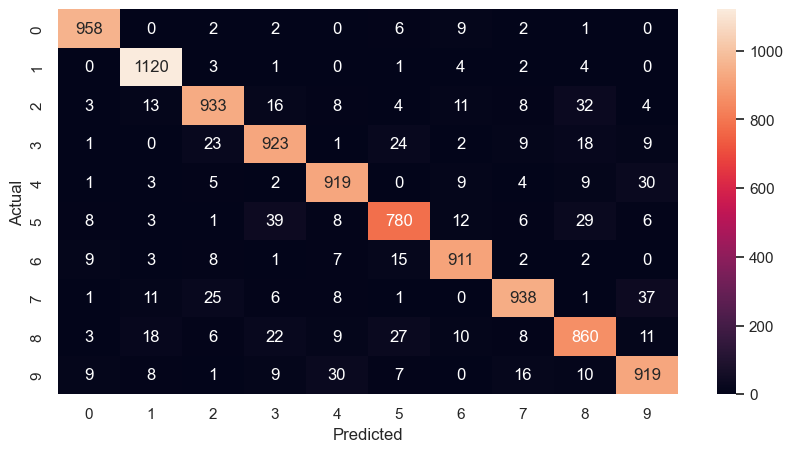

In [21]:
sns.set()
plt.figure(figsize=(10,5))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [22]:
# help(sns.heatmap)

In [23]:
# with hidden layer
ann = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'), #100 is no. of neurons in hidden layer
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid') # output layer activation should be sigmoid
])

ann.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
ann.fit(X_train_flat, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2487 - accuracy: 0.9272
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1074 - accuracy: 0.9664
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0747 - accuracy: 0.9763
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0555 - accuracy: 0.9824
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0442 - accuracy: 0.9861
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0366 - accuracy: 0.9882
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0302 - accuracy: 0.9904
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0265 - accuracy: 0.9913
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0227 - accuracy: 0.9922
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.019

In [24]:
# accuracy of ann model with hiden layers on test dataset
ann.evaluate(X_test_flat, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0988 - accuracy: 0.9750


[0.09882146865129471, 0.9750000238418579]

- accuracy is 97.6 on test set

In [25]:
y_pred = ann.predict(X_test_flat)
y_pred[0]

313/313 [==============================] - 0s 1ms/step


array([2.1383759e-04, 4.2566877e-02, 1.0477912e-01, 9.9758887e-01,
       2.4283572e-06, 2.1376242e-03, 1.0018955e-08, 1.0000000e+00,
       2.0761302e-02, 9.9469639e-02], dtype=float32)

In [26]:
y_pred_integer = [np.argmax(ele) for ele in y_pred]
y_pred_integer[:5]

[7, 2, 1, 0, 4]

In [27]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

<Axes: >

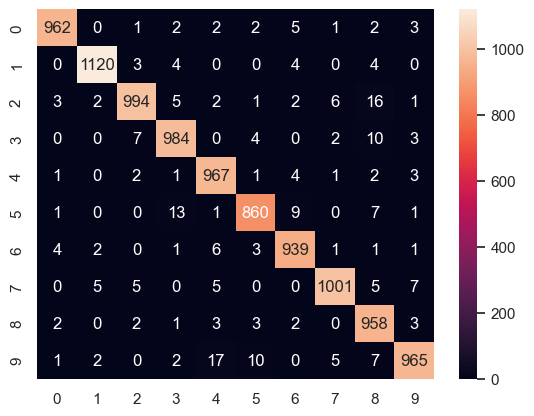

In [28]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_pred_integer)
sns.heatmap(cm, annot=True, fmt='d')


In [29]:
#  if you dont want to flatten the arrays of X_train and X_test. we have a feature in Keras to flatten them +. This will
#  avoid the step of making the arrays flatten from 2d to 1d

ann = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

ann.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=10)


Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2530 - accuracy: 0.9251
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1163 - accuracy: 0.9653
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0862 - accuracy: 0.9747
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0700 - accuracy: 0.9802
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0603 - accuracy: 0.9828
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0492 - accuracy: 0.9862
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0448 - accuracy: 0.9874
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0396 - accuracy: 0.9884
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0342 - accuracy: 0.9904
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.031

In [30]:
ann.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1213 - accuracy: 0.9754


[0.12132947146892548, 0.9753999710083008]

In [31]:
# help(ann.compile)

# CNN

In [32]:
cnn = keras.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu',input_shape=(28,28,1)),
#28,28,1 for digits if data has image then 28,28,3
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Flatten(),
    layers.Dense(100, activation='relu'),
    layers.Dense(10, activation='sigmoid')
])

cnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.1323 - accuracy: 0.9596
Epoch 2/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0421 - accuracy: 0.9868
Epoch 3/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0291 - accuracy: 0.9904
Epoch 4/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0211 - accuracy: 0.9933
Epoch 5/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0156 - accuracy: 0.9952
Epoch 6/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0138 - accuracy: 0.9956
Epoch 7/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0101 - accuracy: 0.9965
Epoch 8/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0084 - accuracy: 0.9971
Epoch 9/10
1875/1875 [==============================] - 20s 10ms/step - loss: 0.0064 - accuracy: 0.9979
Epoch 10/10
1875/1875 [==============================] - 19s 10m

In [33]:
cnn.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0417 - accuracy: 0.9896


[0.041712816804647446, 0.9896000027656555]

In [34]:
y_pred = cnn.predict(X_test)
y_pred_integer = [np.argmax(ele) for ele in y_pred]
y_pred_integer[:5]

313/313 [==============================] - 2s 5ms/step


[7, 2, 1, 0, 4]

In [35]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

<Axes: >

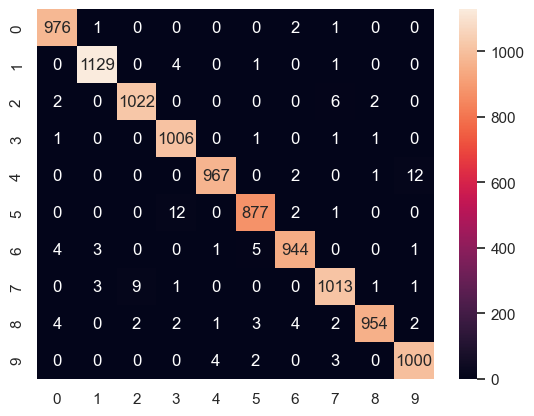

In [36]:
cm=tf.math.confusion_matrix(labels=y_test, predictions=y_pred_integer)
sns.heatmap(cm, annot=True, fmt='d')


# MODELS
- ANN accuracy on test set = 97
- CNN  accuracy on test set = 98